In [19]:
#Dependencies
import math
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
#Load the data
df = pd.read_csv("data/ETH-USD_2015_2022.csv", encoding = 'utf-8')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [21]:
# Set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2017-11-09,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [22]:
future_days = 5

In [23]:
# Create a new column
df[str(future_days)+'_Day_Price_Forecast'] = df[['Close']].shift(-future_days)

# Show data
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2017-11-09,320.884003,337.631012
2017-11-10,299.252991,333.356995
2017-11-11,314.681000,330.924011
2017-11-12,307.907990,332.394012
2017-11-13,316.716003,347.612000
...,...,...
2022-05-07,2636.093018,NaN
2022-05-08,2517.459961,NaN
2022-05-09,2245.430420,NaN
2022-05-10,2343.510986,NaN


In [24]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[ 320.884003]
 [ 299.252991]
 [ 314.681   ]
 ...
 [2940.644775]
 [2749.213135]
 [2694.979736]]


In [25]:
y = np.array(df[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[ 337.631012  333.356995  330.924011 ... 2245.43042  2343.510986
 2362.600586]


In [26]:
# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [27]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [28]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.9769202330171638


In [29]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 370.63085914  137.02626582  583.41777167  124.37538974  566.11036739
  596.87116893  217.27088137  126.79029196  185.13899259 3395.47413637
  247.00912845  240.7337177   216.71439797  186.08981956  517.6537057
  174.61725819 2491.38982723  184.75075216 2715.39190114  160.95405371
  170.18406271 1016.86934273  255.46343552  144.26660309  315.16059395
  213.94495952  176.51810927  394.30835922 1077.55720575  128.59141478
  581.53675931 1727.50734263  284.57048358  346.26579288  189.09354983
 1237.12270973  195.7944679  3413.56167658  464.22686088  300.22722746
  740.3852945  3722.26814743 4315.11760841  382.9593258   236.86323437
  370.84792051 2615.99524092 3435.79626297  273.98333468  714.71714435
  138.29125507  874.51948638 4018.67604746 3561.74271937 1937.30549356
  762.49553825  283.83331514  141.75932441  144.94157245  213.73653411
  132.30612718  230.44776384 1839.80153506  248.33584125 2995.10749987
  293.21062589  176.79712853  626.3852886   365.09322721  219.62167892
  591.0

In [30]:
print(y_test)

[ 379.484039  133.263077  638.290833  113.405289  614.842529  575.758057
  230.768005  149.554337  186.891632 3285.511719  244.698914  112.347122
  212.289413  185.028717  587.324158  182.021561 2036.721069  220.589005
 2590.696045  148.965073  157.59639  1107.069946  255.858948  145.873932
  345.554657  211.186554  123.295998  391.120453 1071.130005  117.362885
  601.908997 1819.684937  284.105011  375.142059  216.968231 1332.492188
  210.096741 3545.354004  464.036987  336.753174  868.70697  4171.663574
 4084.452393  409.766693  206.733536  341.786072 2679.162598 3748.760254
  310.424683  774.534973  135.460358 1153.170044 4037.547607 3550.386963
 2124.776611  752.856995  300.834015  135.031021  142.927109  180.806
  129.063889  229.074112 1791.702271  309.643616 3319.257324  281.944
  173.059143  737.803406  353.956787  170.8927    519.742004 1446.033691
   91.685654  175.365677 1691.333984 3122.608643  212.339081 3580.562012
 2724.619873  219.617996 2781.111816  229.928909 1396.420

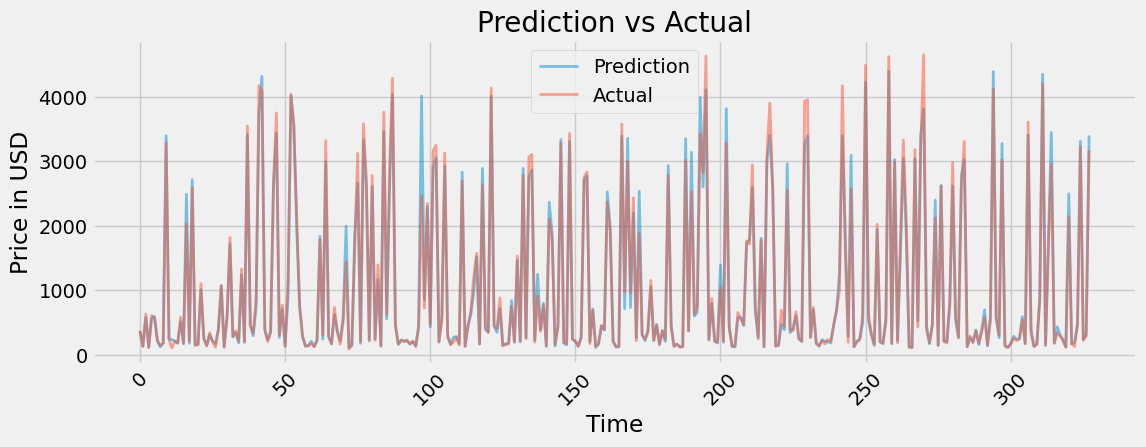

In [32]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.5)
plt.plot(y_test, label='Actual', lw=2, alpha=.5)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()